# Lab 09 - M-ary Amplitude and Frequency Shift Keying, Signal Space

### Maurice Woods

### 25 April 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - Amplitude Shift Keying

In [1]:
from pylab import *
import ecen4652 as ecen
import quick
import keyfun
import ascfun
import pamfun
import ptfun
import showfun
import wavfun
import filtfun

##### Part A)

Start a new Python module called keyfun.py and use your pam12 function from the pamfun module as a building block to complete the ASK transmitter function $askxmtr$

" M " Unipolar ASCII sequence:  [1 0 1 1 0 0 1 0] 

XMTR: Coherent Signal


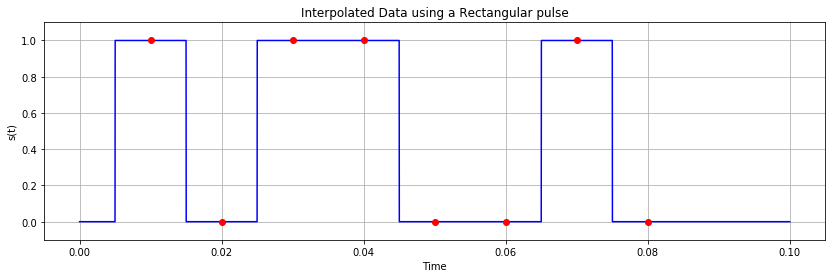

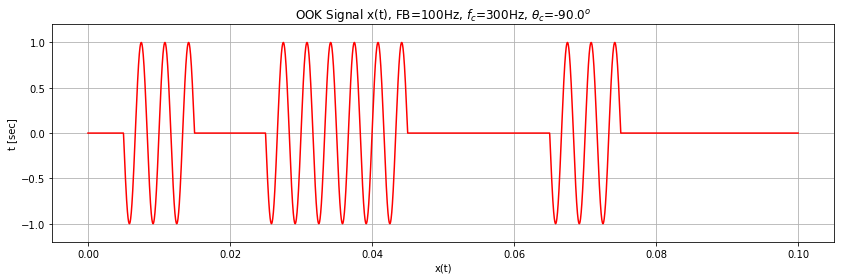

XMTR: Coherent Signal


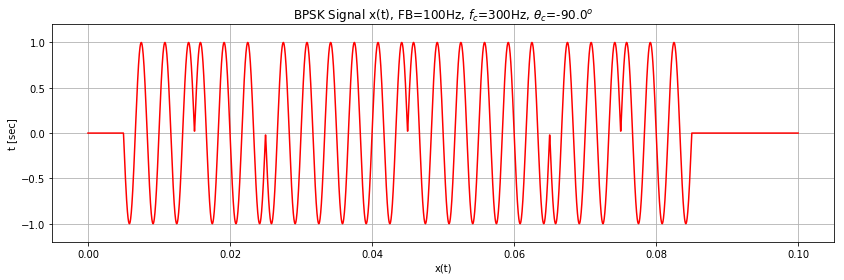

XMTR: Non-Coherent Signal


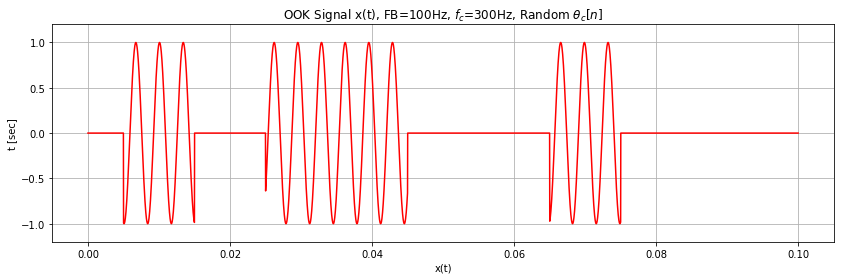

In [2]:
FB = 100
Fs = 44100
fc = 300

string = "M"
dn = ascfun.asc2bin(string,8)
seq_an = ecen.sigSequ(dn,FB)
print('"',string,'" Unipolar ASCII sequence: ', seq_an.sig, '\n')

thetacn = rand()
thetac = -pi/2.0

[xt_unicoh,st_unicoh]=keyfun.askxmtr(seq_an,Fs,'rect',[],'coh',[fc,thetac],['nopulse'])
tt=quick.quicktt(xt_unicoh.signal(),Fs)
quick.quickplot(tt,xt_unicoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()*2)-1

[xt_bicoh,st_bicoh]=keyfun.askxmtr(seq_an,Fs,'rect',[],'coh',[fc,thetac],['noplot'])
#tt=quick.quicktt(st_bicoh.signal(),Fs)
quick.quickplot(tt,xt_bicoh.signal(),'r',[],[],'','BPSK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()+1)/2.0

[xt_uninoncoh,st_uninoncoh]=keyfun.askxmtr([seq_an,'rand'],Fs,'rect',[],'noncoh',[fc],['noplot'])
#tt=quick.quicktt(st_uninoncoh.signal(),Fs)
quick.quickplot(tt,xt_uninoncoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, Random $\\theta_c[n]$','x(t)','t [sec]')

##### Part B)

In the keyfun.py module, complete the following ASK receiver function, called $askrcvr$. Use it to receive coherent and noncoherent ASK signals, and to make scatter plots.

Use the $pamrcvr10$ function in module $pamfun$ as part of the ASK receiver. Test $askrcvr$ together with askxmtr using random (unipolar) binary data and the parameters given in part (a).

In [3]:
dly=0

ptype = 'rect'
[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,dly],ptype,[1,1])
print("Coherent OOK:", sig_bt.signal()[ixn[1:9]],'\n')
#tt=quick.quicktt(sig_bt.signal(),Fs)
#quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_bicoh,'coh',[fc,thetac],[FB,dly],ptype,[1,1])
#tt=quick.quicktt(sig_bt.signal(),Fs)
#quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')
print("Coherent BPSK:", sig_bt.signal()[ixn[1:9]],'\n')

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_uninoncoh,'noncoh',fc,[FB,dly],ptype,[1,1])
#tt=quick.quicktt(sig_bt.signal(),Fs)
#quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or')
print("Non-coherent OOK:", sig_bt.signal()[ixn[1:9]],'\n')

RCVR: Coherent Signal
Coherent OOK: [ 1.  0.  1.  1.  0.  0.  1.  0.] 

RCVR: Coherent Signal
Coherent BPSK: [ 1. -1.  1.  1. -1. -1.  1. -1.] 

RCVR: Non-Coherent Signal
Non-coherent OOK: [ 1.  0.  1.  1.  0.  0.  1.  0.] 



##### Part C)

Let $F_s = 44100$Hz, $F_B = 100$baud, $f_c = 2100$Hz, and let $p(t)$ be a rectangular pulse of width $T_B$ . Use random binary data to produce (i) a coherent OOK signal, (ii) a noncoherent OOK signal, and (iii) a BPSK signal, each of duration 2 sec. Plot and compare the PSDs for
all three cases. Then use the $wt$ and $wn=wt[ixn]$ outputs of the askrcvr function to make scatter plots for the three signals and compare them. 

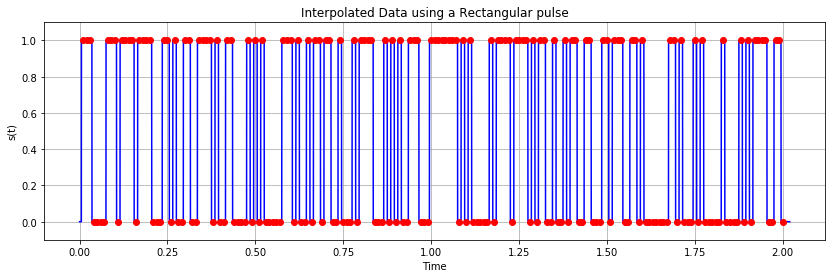

XMTR: Coherent Signal
XMTR: Coherent Signal
XMTR: Non-Coherent Signal


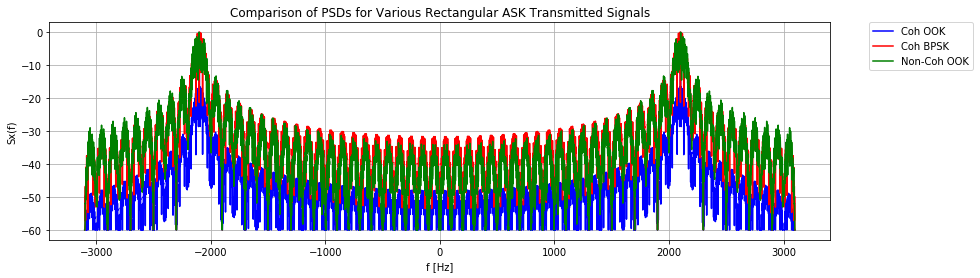

RCVR: Coherent Signal


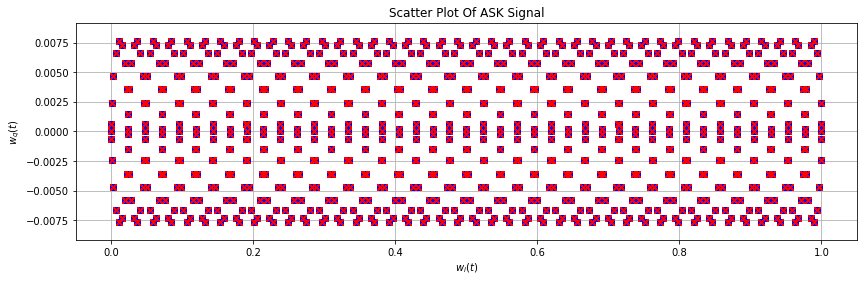

RCVR: Coherent Signal


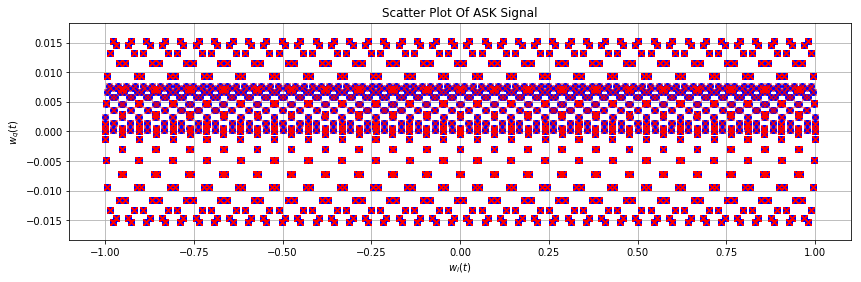

RCVR: Non-Coherent Signal


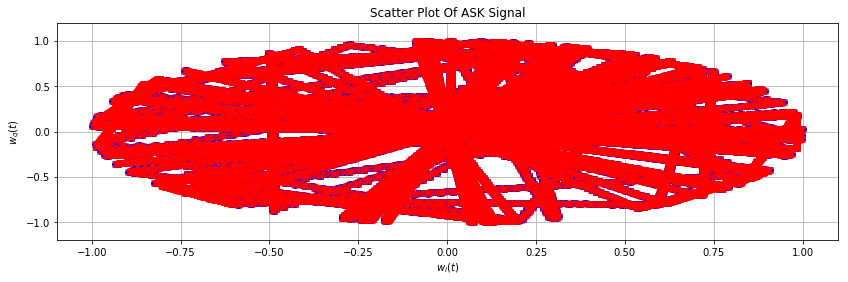

In [4]:
Fs = 44100 # [Hz]
FB = 100 # [baud]
fc = 2100 # [Hz]
t = 2 # [sec]
ptype = 'rect'
pparms = []

pt = ptfun.pampt(Fs/FB, ptype)






[sig_pt,seq_an] = pamfun.randompam(t,ptype,pparms,FB,Fs,'uni')
[xt_unicoh,st_unicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_unicoh,ff] = showfun.showpsd(xt_unicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')

#tt=quick.quicktt(st_unicoh.signal(),Fs)
#quick.quickplot(tt,xt_unicoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()*2)-1
[xt_bicoh,st_bicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_bicoh.signal(),Fs)
#quick.quickplot(tt,xt_bicoh.signal(),'r',[],[],'','BPSK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()+1)/2.0
[xt_uninoncoh,st_uninoncoh]=keyfun.askxmtr([seq_an,'rand'],Fs,ptype,pparms,'noncoh',[fc],['noplot'])
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_uninoncoh.signal(),Fs)
#quick.quickplot(tt,xt_uninoncoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, Random $\\theta_c[n]$','x(t)','t [sec]')

#quick.quickplot(ff,psd_unicoh,'-b',ff,psd_bicoh,'-r')
plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)')
grid()
plt.title('Comparison of PSDs for Various Rectangular ASK Transmitted Signals')
show()






[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_bicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_uninoncoh,'noncoh',fc,[FB,0.5],ptype,[1,1])
showfun.showscatter(sig_wt,ixn)

Are there any interesting spectral lines if you look at the PSDs of the squared ASK signals? How do things change if you use a triangular pulse $p(t)$ (of total width $2T_B$ from $−T_B$ to $+T_B$ ) instead of the rectangular pulse?

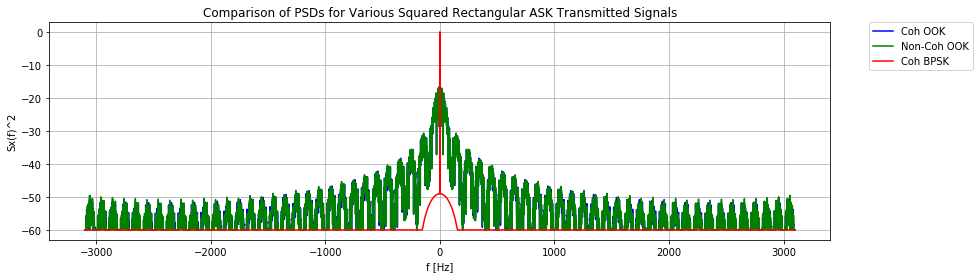

In [5]:
xt_unicoh_sqrd = xt_unicoh.copy()
xt_bicoh_sqrd = xt_bicoh.copy()
xt_uninoncoh_sqrd = xt_uninoncoh.copy()

xt_unicoh_sqrd.sig = xt_unicoh.signal()**2
xt_bicoh_sqrd.sig = xt_bicoh.signal()**2
xt_uninoncoh_sqrd.sig = xt_uninoncoh.signal()**2

[psd_unicoh,ff] = showfun.showpsd(xt_unicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')

plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)^2')
grid()
plt.title('Comparison of PSDs for Various Squared Rectangular ASK Transmitted Signals')
show()

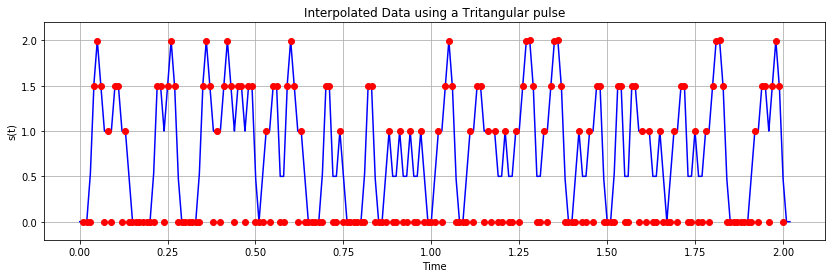

XMTR: Coherent Signal
XMTR: Coherent Signal
XMTR: Non-Coherent Signal


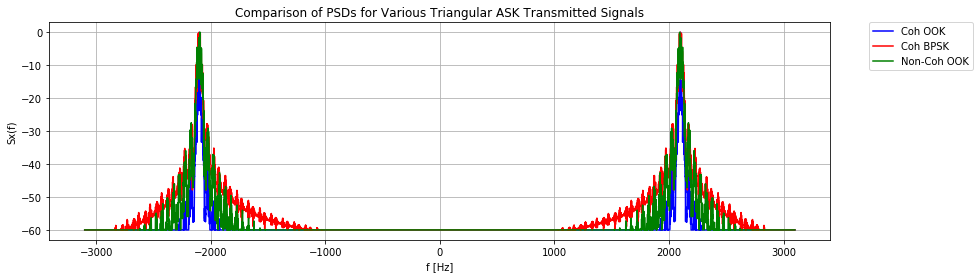

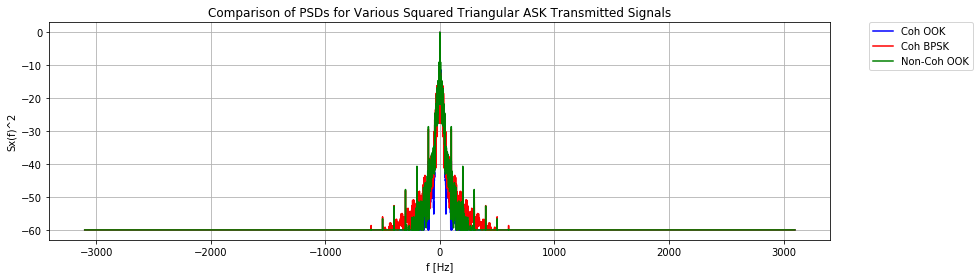

RCVR: Coherent Signal


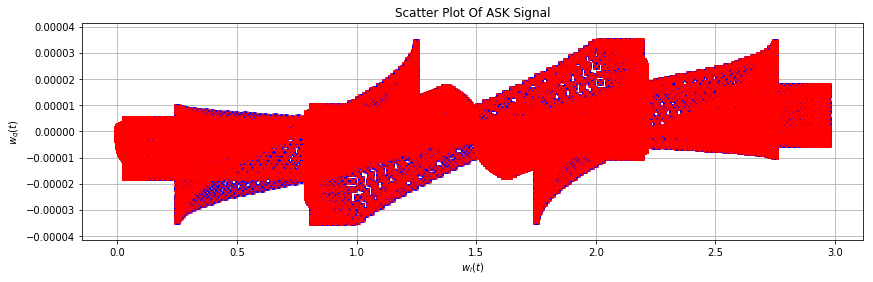

RCVR: Coherent Signal


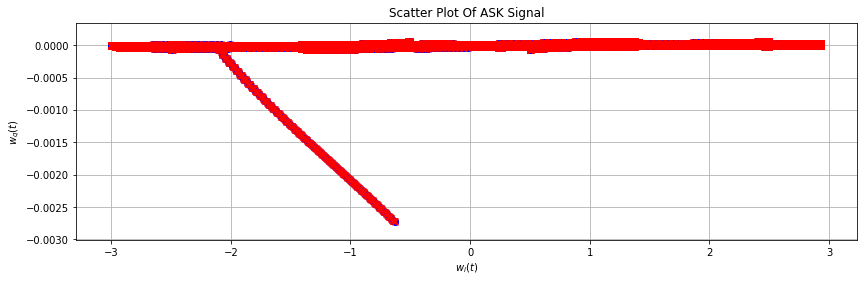

RCVR: Non-Coherent Signal


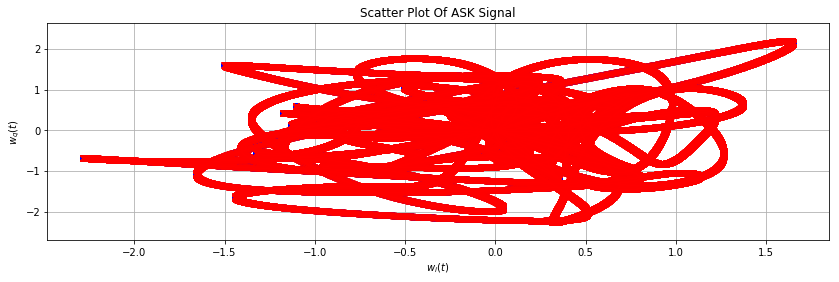

In [6]:
ptype = 'tri'

pt = ptfun.pampt(Fs/FB, ptype)






[sig_pt,seq_an] = pamfun.randompam(t,ptype,pparms,FB,Fs,'uni')
[xt_unicoh,st_unicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_unicoh,ff] = showfun.showpsd(xt_unicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')

#tt=quick.quicktt(st_unicoh.signal(),Fs)
#quick.quickplot(tt,xt_unicoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()*2)-1
[xt_bicoh,st_bicoh]=keyfun.askxmtr(seq_an,Fs,ptype,pparms,'coh',[fc,thetac],['noplot'])
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_bicoh.signal(),Fs)
#quick.quickplot(tt,xt_bicoh.signal(),'r',[],[],'','BPSK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, $\\theta_c$='+str(thetac*180/pi)+'$^o$','x(t)','t [sec]')

seq_an.sig = (seq_an.signal()+1)/2.0
[xt_uninoncoh,st_uninoncoh]=keyfun.askxmtr([seq_an,'rand'],Fs,ptype,pparms,'noncoh',[fc],['noplot'])
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh,[-fc-1000,fc+1000,-60],Fs,'noplot')
#tt=quick.quicktt(st_uninoncoh.signal(),Fs)
#quick.quickplot(tt,xt_uninoncoh.signal(),'r',[],[],'','OOK Signal x(t), FB='+str(FB)+'Hz, $f_c$='+str(fc)+'Hz, Random $\\theta_c[n]$','x(t)','t [sec]')

#quick.quickplot(ff,psd_unicoh,'-b',ff,psd_bicoh,'-r')
plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)')
grid()
plt.title('Comparison of PSDs for Various Triangular ASK Transmitted Signals')
show()






xt_unicoh_sqrd = xt_unicoh.copy()
xt_bicoh_sqrd = xt_bicoh.copy()
xt_uninoncoh_sqrd = xt_uninoncoh.copy()

xt_unicoh_sqrd.sig = xt_unicoh.signal()**2
xt_bicoh_sqrd.sig = xt_bicoh.signal()**2
xt_uninoncoh_sqrd.sig = xt_uninoncoh.signal()**2

[psd_unicoh,ff] = showfun.showpsd(xt_unicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_bicoh,ff] = showfun.showpsd(xt_bicoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')
[psd_uninoncoh,ff] = showfun.showpsd(xt_uninoncoh_sqrd,[-fc-1000,fc+1000,-60],Fs,'noplot')

plt.figure(figsize=(14,4))
plt.plot(ff,psd_unicoh,'-b',label="Coh OOK")
plt.plot(ff,psd_bicoh,'-r',label="Coh BPSK")
plt.plot(ff,psd_uninoncoh,'-g',label="Non-Coh OOK")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('f [Hz]')
plt.ylabel('Sx(f)^2')
grid()
plt.title('Comparison of PSDs for Various Squared Triangular ASK Transmitted Signals')
show()






[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_unicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_bicoh,'coh',[fc,thetac],[FB,0.5],ptype,[1,1])
showfun.showscatter(sig_wt,ixn)

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(xt_uninoncoh,'noncoh',fc,[FB,0.5],ptype,[1,1])
showfun.showscatter(sig_wt,ixn)

##### Part D)

The wav files asksig901.wav, asksig902.wav and asksig903.wav are binary ASK signals which contain 8-bit, LSB-first, ASCII signals. Analyze the three signals and extract the text messages.

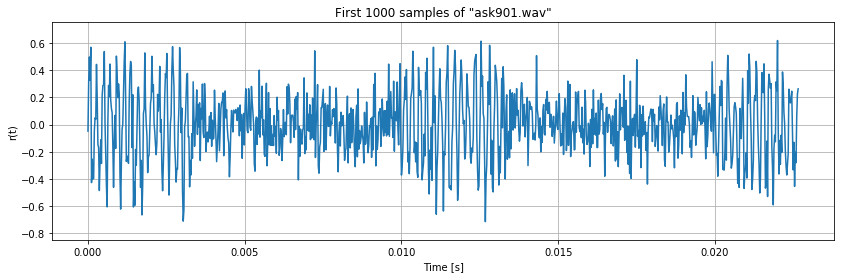

This appears to be a noncoherent BPSK signal


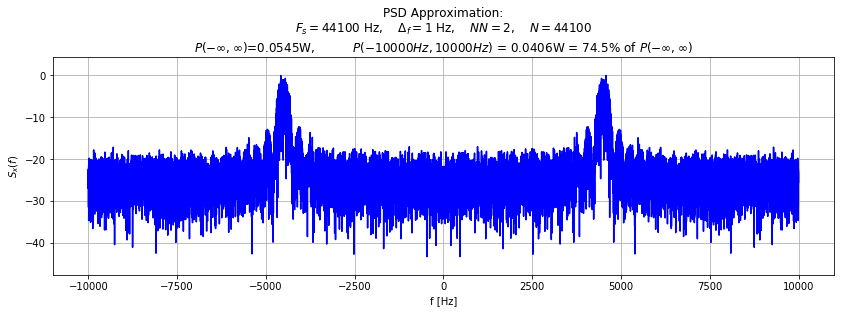

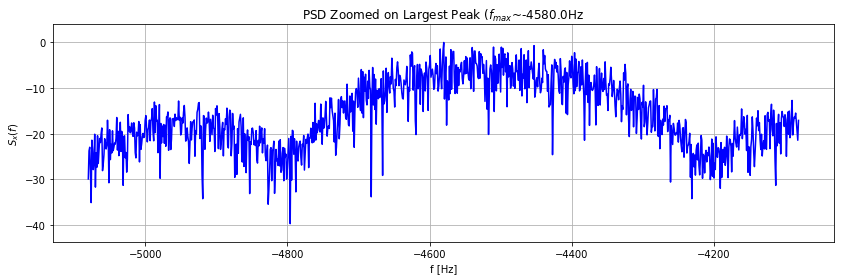

Band Pass Filter: fBW= 300 Hz, fc= 4500 Hz


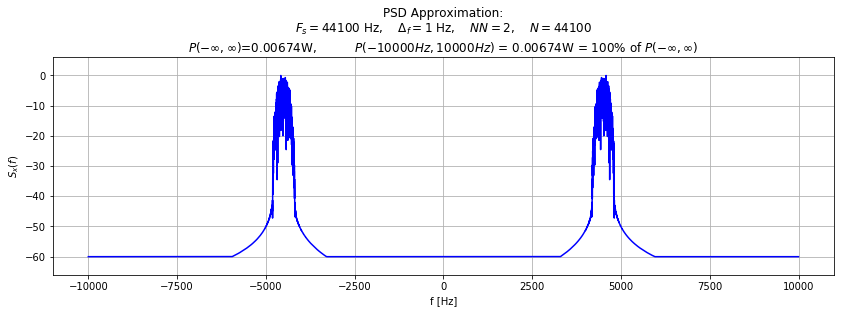

RCVR: Non-Coherent Signal


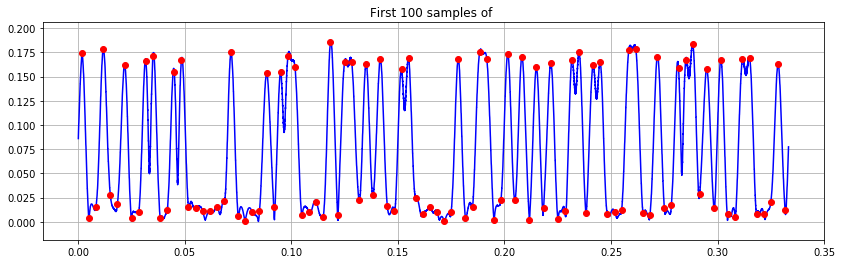

If the Secret Service finds shredded paper in your trash, they WILL piece it back together!


In [7]:
[asksig901,framerate901] = wavfun.wavread('asksig901.wav')

tt901 = quick.quicktt(asksig901,framerate901)

quick.quickplot(tt901,asksig901,'',[],[],'','"ask901.wav"','Time [s]','r(t)',['first',1000])
print('This appears to be a noncoherent BPSK signal')

sig_asksig901 = ecen.sigWave(asksig901,framerate901)

showfun.showpsd(sig_asksig901,[-10000,10000,-60],framerate901,'','zoom')

fc=4500
FB=300
thetac=0
dly=0.5
ptype = 'rect'

[sig_asksig901, order] = filtfun.trapfilt(sig_asksig901, [FB, fc], 20, .05)
showfun.showpsd(sig_asksig901,[-10000,10000,-60],framerate901,'')

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(sig_asksig901,'noncoh',fc,[FB,dly],ptype,[])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or','','','',['first',100])

[text901,ascii901]=ascfun.bin2asc(seq_bn.signal(), 8, 0.05)
print(text901)

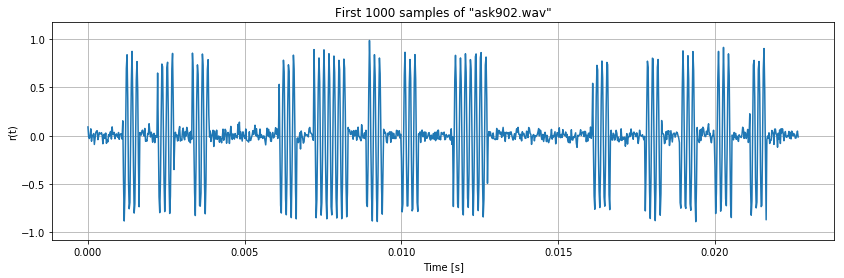

This appears to be an OOK signal


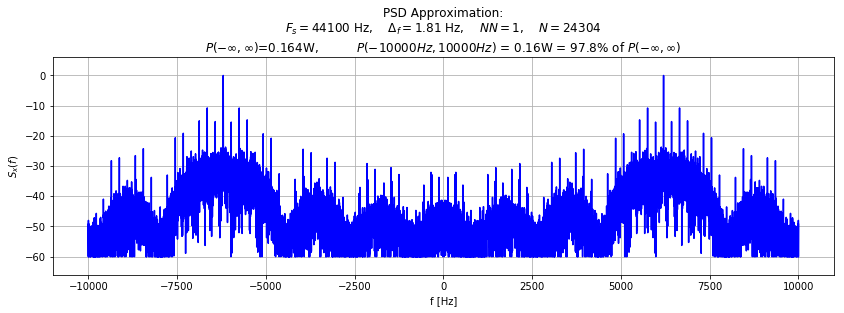

Band Pass Filter: fBW= 1800 Hz, fc= 6200 Hz


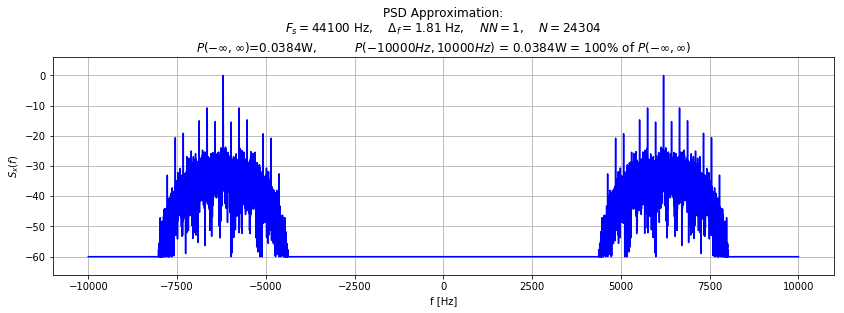

RCVR: Coherent Signal


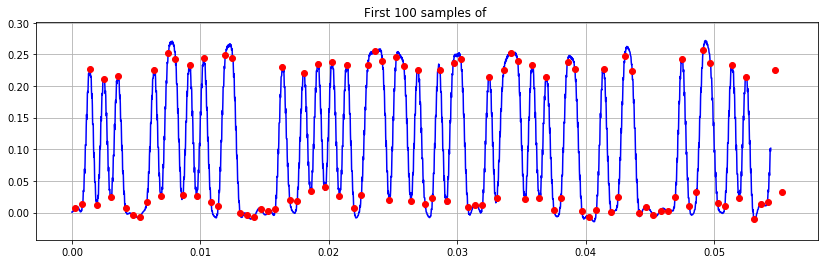

The United States is number one in cosmetics spending, yet ranked number 23 on the world's "satisfaction with life" ranking.


In [8]:
[asksig902,framerate902] = wavfun.wavread('asksig902.wav')


tt902 = quick.quicktt(asksig902,framerate902)

quick.quickplot(tt902,asksig902,'',[],[],'','"ask902.wav"','Time [s]','r(t)',['first',1000])
print('This appears to be an OOK signal')

sig_asksig902 = ecen.sigWave(asksig902,framerate902)
showfun.showpsd(sig_asksig902,[-10000,10000,-60],framerate902)

fc = 6200
FB = 1800

[sig_asksig902, order] = filtfun.trapfilt(sig_asksig902, [FB, fc], 20, .05)
showfun.showpsd(sig_asksig902,[-10000,10000,-60],framerate902)

thetac=-15*pi/180.0
ptype='rect'
dly = 0.5

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(sig_asksig902,'coh',[fc,thetac],[FB,dly],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,-1*sig_bt.signal(),'-b',tt[ixn],-1*seq_bn.signal(),'or','','','',['first',100])

[text902,ascii902]=ascfun.bin2asc(-1*seq_bn.signal(), 8, 0.15)
print(text902)

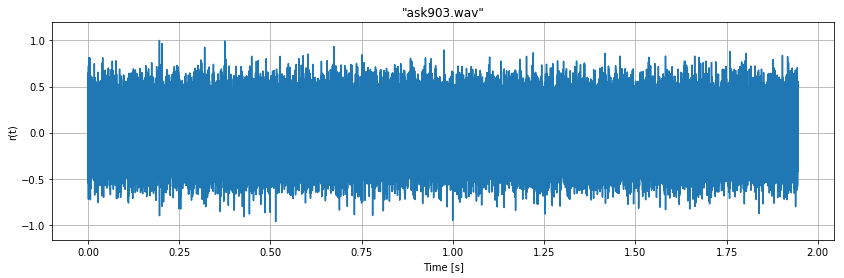

This appears to be a coherent BPSK signal


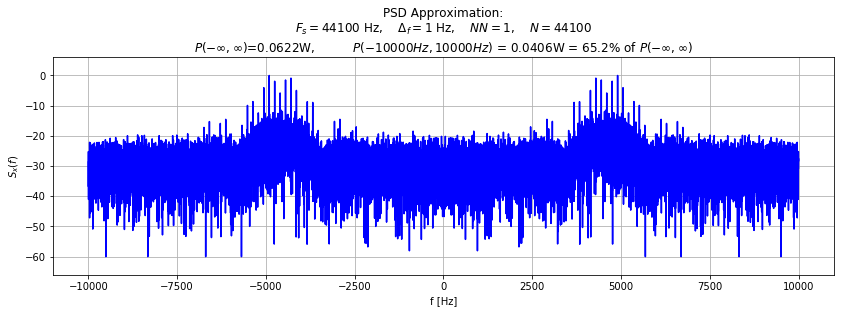

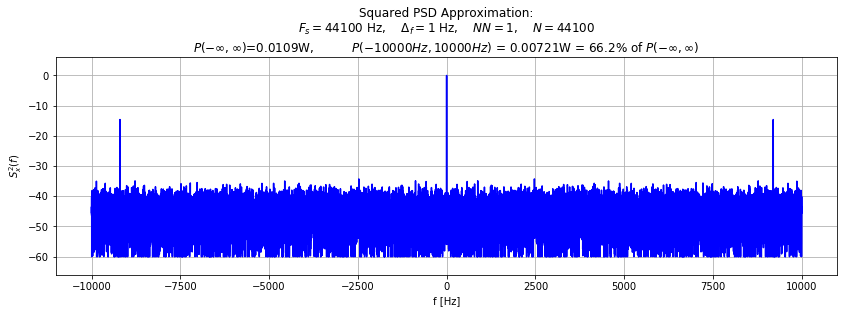

Band Pass Filter: fBW= 1225 Hz, fc= 4599.0 Hz


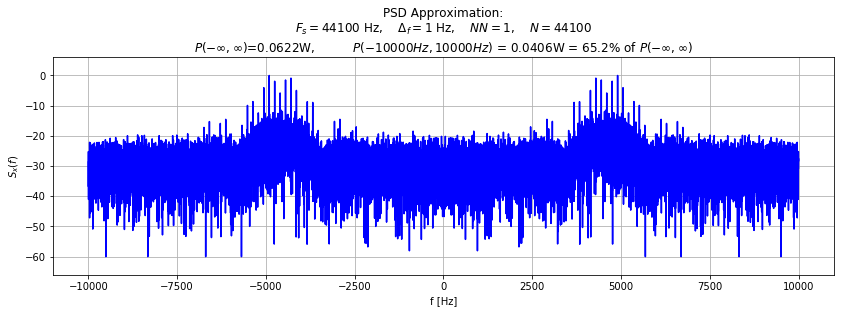

RCVR: Coherent Signal


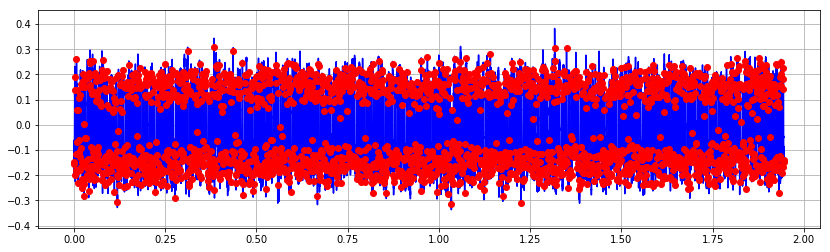

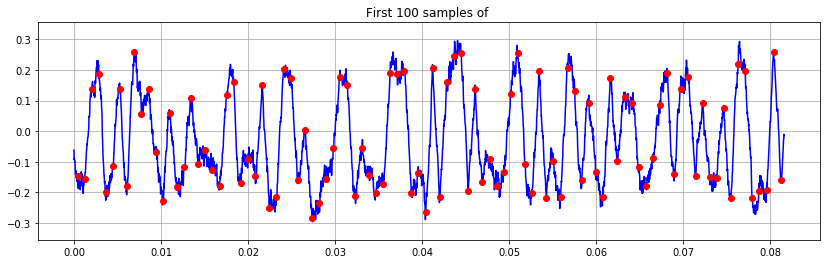

L'adaptabilite est le secret de la survie. Selon Charles Darwin, ni le plus fort ni le(plus intelligent mais seulement les especes les plus adaptables gagne a la fin. Alors faites de votre mieux pour etre le plus adaptable, dans votre vie personnelle autant que dans les relations professionnelles.


In [9]:
[asksig903,framerate903] = wavfun.wavread('asksig903.wav')

tt903 = quick.quicktt(asksig903,framerate903)

quick.quickplot(tt903,asksig903,'',[],[],'','"ask903.wav"','Time [s]','r(t)')
print('This appears to be a coherent BPSK signal')

FB = 1225
fc = ceil(9197/2)

sig_asksig903 = ecen.sigWave(asksig903,framerate903)

showfun.showpsd(sig_asksig903,[-10000,10000,-60],framerate903)
showfun.showpsd(sig_asksig903,[-10000,10000,-60],framerate903,'','','sqrd')


[sig_asksig903, order] = filtfun.trapfilt(sig_asksig903, [FB, fc], 20, .05)

sig_asksig903 = ecen.sigWave(asksig903,framerate903)
showfun.showpsd(sig_asksig903,[-10000,10000,-60],framerate903)

ptype='rect'
dly = 0.5
thetac = 0

[seq_bn,sig_bt,sig_wt,ixn] = keyfun.askrcvr(sig_asksig903,'coh',[fc,thetac],[FB,dly],ptype,[1,1])
tt=quick.quicktt(sig_bt.signal(),Fs)
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or','','','')
quick.quickplot(tt,sig_bt.signal(),'-b',tt[ixn],seq_bn.signal(),'or','','','',['first',100])

[text903,ascii903]=ascfun.bin2asc(seq_bn.signal(), 8, -0.01)
print(text903)

This one was VERY sensitive to FB!

## EC 02 - Frequency Shift Keying

In [ ]:
from pylab import *
import ecen4652 as ecen
import quick
import keyfun
import showfun

##### Part A)
For the Python module keyfun.py, write a function
called fskxmtr which implements an M -ary FSK transmitter for either coherent, noncoherent, or continuous phase FSK.

Test fskxmtr by recreating the three (time domain) sample graphs for $F_B = 100 baud$, $f_c0 = 300 Hz$ and $f_c1 = 400 Hz$, which were given in the introduction for binary coherent FSK, noncoherent FSK, and CPFSK. Use $d_n = \{0, 1, 1, 1, 0, 0, 1, 0\}$ and (for the second graph) $θ_c [n] = \{270^◦ , 225^◦ , 4^◦ , 135^◦ , 250^◦ , 90^◦ , 40^◦ , 240^◦ \}$.

In [ ]:
M = 2
Fs = 44100
FB = 100
fc0 = 300
fc1 = 400
thetac0 = -pi/2.0
thetac1 = -pi/2.0
dn = asarray([0,1,1,1,0,0,1,0])
thetacn = (asarray([-270,225,4,135,-250,-90,40,-240])*pi/180.0)
fcparms = [[fc0,fc1],[thetac0,thetac1]]
ptype = 'rect'
pparms = []

sig_xt_coh = keyfun.fskxmtr(M,ecen.sigSequ(dn,FB),Fs,ptype,pparms,'coh',[[fc0,fc1],[-thetac0,thetac1]])
showfun.showpsd(sig_xt_coh,[-1000,1000,-60],Fs)

sig_xt_noncoh = keyfun.fskxmtr(2,ecen.sigSequ([dn,thetacn],FB),Fs,ptype,pparms,'noncoh',[fc0,fc1])



##### Part B)
In the keyfun.py module, implement the FSK receiver function $fskrcvr$

Test all receiver modes with the signals that you generated in (a) when you were testing $fskxmtr$.

In [ ]:
[sig_bn_coh,sig_wt_coh,ixn_coh]=keyfun.fskrcvr(M,sig_xt_coh,'coh',[[fc0,fc1],[thetac0,thetac1]],[FB,0.5],ptype,pparms)
[sig_bn_non,sig_wt_non,ixn_non]=keyfun.fskrcvr(M,sig_xt_noncoh,'noncoh',[fc0,fc1],[FB,0.5],ptype,pparms)

print('Received Coherent FSK Signal: ',sig_bn_coh.signal()[0:8])
print('Received Non-Coherent FSK Signal: ',sig_bn_non.signal()[0:8])

##### Part C)
Generate a coherent binary FSK signal from random data with equally likely 0’s and 1’s, using a rectangular $p(t)$, $F_B = 100 baud$, $f_c0 = 300 Hz$, $θ_c0 = 0^◦$ , $f_c1 = 400 Hz$, and $θ_c1 = 0^◦$. Use a coherent demodulator to produce a scatter plot of $w_0 [n]$ versus $w_1 [n]$. Change the phase $θ_c1$ from $0^◦$ to $180^◦$ and check whether the signals transmitted at f c0 and at f c1 remain orthogonal in the signal space spanned by w 0 [n] and w 1 [n]. Is it possible to reduce the frequency spacing $\Delta_f = f_c1 − f_c0$ to a value less than $F_B$ while maintaining orthogonality? Try changing $f c1$ to 350 Hz and vary the phase $θ_c1$ again from $0^◦$ to $180^◦$ .

In [ ]:
FBparms = [100,0]
sig2b_xt_coh = keyfun.fskxmtr(M, ecen.sigSequ(dn, 100, 0), 44100, 'rect', [], 'coh', [[300, 400], [0, 0]])
[sig2b_bn_coh, sig2b_wt_coh, ixc_2b] = keyfun.fskrcvr(M, sig2b_xt_coh, 'coh', [[300, 400], [0, 0]], FBparms, 'rect', [])


##### Part D)
Use uniformly distributed random M -ary data of length about 2 sec to generate PSD plots of M = 2 and M = 4 coherent, noncoherent, and continous-phase FSK (CPFSK) signals with rectangular p(t). Determine the -40dB bandwidth in all cases. Use $F_B = 100$ baud, $f_c0 = 2100 Hz$, and $f_{cm} = f_{c0} + mF_B$ . For coherent FSK set $\theta_{cm} = 0$ for all m. For CPFSK choose the phases $\theta_{cm}$ such that there are no phase jumps.

In [ ]:
M = 4
FB = 100
FBparms = [FB, 0]
fcparms = [[2100, 2200, 2300, 2400],[0, 0, 0, 0]]
Fs = 44100

dn = np.random.randint(M, size=FBparms[0]*2)
# Coherent 4-ary
sig_xt_coh = keyfun.fskxmtr(M, ecen.sigSequ(dn, FB), Fs, 'rect', [], 'coh', fcparms)
showfun.showpsd(sig_xt_coh,[-10000,10000,-60],Fs)

# Non-coherent 4-ary
sig_xt_noncoh = keyfun.fskxmtr(M, ecen.sigSequ([dn,zeros(len(dn))], FB), Fs, 'rect', [], 'noncoh', fcparms[0])
showfun.showpsd(sig_xt_noncoh,[-10000,10000,-60],Fs)

##### Part E)
The wav files fsksig901.wav and fsksig902.wav contain binary FSK signals made from 8-bit, LSB-first, ASCII encoded characters. Analyze the two signals and extract the text messages.

##### Part F)
The binary GNU Radio file digMod_905.bin contains several (complex-valued) binary communication signals. Use the GNU Radio Companion to find the signals recorded in the file and determine their properties such as the type of modulation and the carrier frequencies. Each of the signals contains an ASCII coded (MSB first) message. Try to demodulate the signals and extract the messages.

> As was the case in Lab08, I have been unable to get the GRC flowgraphs which use large $.bin$ files to load and run without an impossibale amount of lag. Therefore, I used Bryce Hill's Ubuntu setup to run these programs and acquire the images needed for this exercise.
>
> First, let's use an FFT to find any frequencies of interest. From this we can identify what seem to be 3 distinct signals (seen in the plot below):
> - 76 kHz
> - 152 kHz
> - 236 kHz
>
> ![2ffft](img/2f_fft.png)
>
> The parameters shown in the screenshot produced a usable constellation chart at around 76kHz:
>
> ![2f1a](img/2f1a.png)
>
> And then, using an envelope detecotor, our message is printed to the terminal
>
> ![2f1b](img/2f1b.png)
>
> While the second signal seems to phase in and out slowly, we can get a good constellation for a bit using the following parameters
>
> ![2f2a](img/2f2a.png)
>
> ![2f2b](img/2f2b.png)
>
> Another envelope detector is used here to extract the third message.
>
> ![2f3a](img/2f3a.png)
>
> ![2f3b](img/2f3b.png)
